<a href="https://colab.research.google.com/github/LuisMig-code/Linear-Regression-com-precos-de-carros/blob/main/Linear_Regression_Ford_Values.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Aplicando Regressão Linear na Predição de valores de carros

In [1]:
# imports necessários:

import time
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')

from sklearn.preprocessing import LabelEncoder
from scipy.stats import chi2_contingency

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [2]:
path_data = "https://raw.githubusercontent.com/LuisMig-code/Linear-Regression-com-precos-de-carros/main/data/ford.csv?raw=true"

Vamos começar fazendo a leitura dos dados:

In [3]:
df = pd.read_csv(path_data)

In [4]:
# visualizando as 5 primeiras linhas do conjunto de dados:
df.head()

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,Fiesta,2017,12000,Automatic,15944,Petrol,150,57.7,1.0
1,Focus,2018,14000,Manual,9083,Petrol,150,57.7,1.0
2,Focus,2017,13000,Manual,12456,Petrol,150,57.7,1.0
3,Fiesta,2019,17500,Manual,10460,Petrol,145,40.3,1.5
4,Fiesta,2019,16500,Automatic,1482,Petrol,145,48.7,1.0


Verificando se temos dados nulos:

In [5]:
df.isnull().sum()

model           0
year            0
price           0
transmission    0
mileage         0
fuelType        0
tax             0
mpg             0
engineSize      0
dtype: int64

Verificando se existem dados duplicados e removendo eles:

In [6]:
df.drop_duplicates(inplace=True)

In [7]:
print("Em nosso conjunto de dados temos {} linhas e {} colunas".format(df.shape[0] , df.shape[1]))

Em nosso conjunto de dados temos 17811 linhas e 9 colunas


O próximo passo é alterar alguns dos tipos das nossas variáveis e converter alguns valores numéricos

In [8]:
# convertendo o tipo das variáveis numéricas
df.price = df.price.astype(int) 

df.year = df.year.astype(int) 

df.mileage = df.mileage.astype(float)

df.tax = df.tax.astype(float)

df.mpg = df.mpg.astype(float)

df.engineSize = df.engineSize.astype(float)

In [9]:
df.sample(5)

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
6251,Fiesta,2014,9495,Manual,21259.0,Petrol,0.0,65.7,1.0
3996,Focus,2014,7000,Manual,25462.0,Diesel,20.0,67.3,1.6
14771,S-MAX,2017,17986,Automatic,52835.0,Diesel,150.0,51.4,2.0
7531,EcoSport,2017,9750,Manual,12797.0,Petrol,125.0,53.3,1.0
3415,Focus,2017,11990,Manual,17212.0,Diesel,0.0,74.3,1.5


Visualmente não temos muitas alterações . Vamos visualizar alguns informações adicionais do nosso *dataset* ?

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17811 entries, 0 to 17964
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   model         17811 non-null  object 
 1   year          17811 non-null  int64  
 2   price         17811 non-null  int64  
 3   transmission  17811 non-null  object 
 4   mileage       17811 non-null  float64
 5   fuelType      17811 non-null  object 
 6   tax           17811 non-null  float64
 7   mpg           17811 non-null  float64
 8   engineSize    17811 non-null  float64
dtypes: float64(4), int64(2), object(3)
memory usage: 1.4+ MB


## Distribuições:

A próxima etapa que iremos fazer é plotar *alguns* gráficos que nos mostrem um pouco mais dos nossos dados:

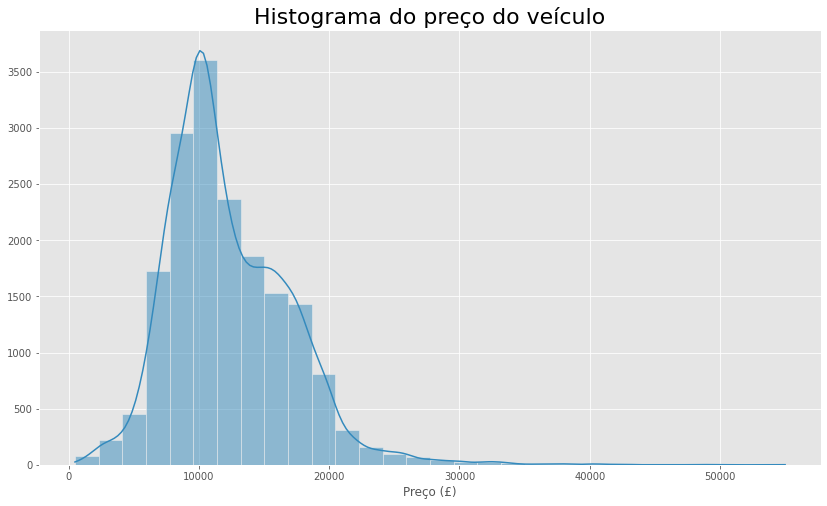

In [11]:
plt.figure(figsize=(14,8))
ax = sns.histplot(df.price , bins=30 , kde=True)
ax.set_title("Histograma do preço do veículo" , fontsize=22)
ax.set_xlabel("Preço (£)")
ax.set_ylabel("")
ax=ax

Podemos ver que nossos dados de preço tem tendência de assimetria negativa (à esquerda) e se concentra mais em valores entre 0 e 20mil Libras

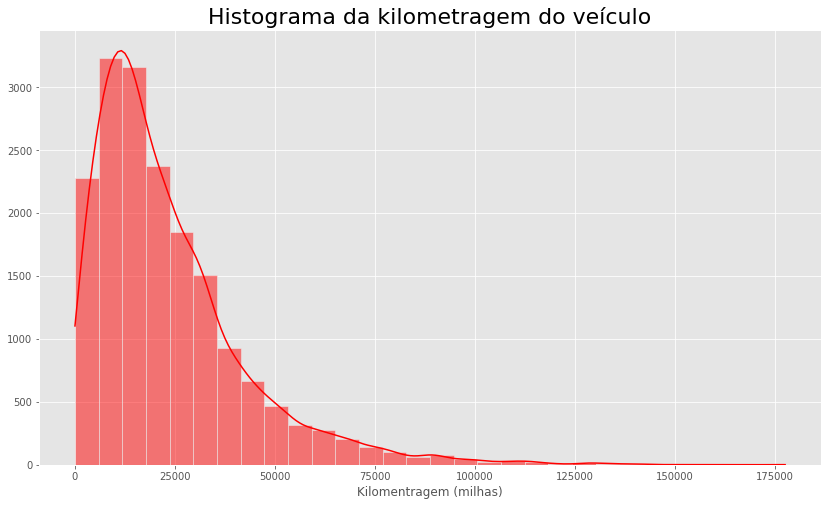

In [12]:
plt.figure(figsize=(14,8))
ax = sns.histplot(df.mileage , bins=30 , kde=True,color="red")
ax.set_title("Histograma da kilometragem do veículo" , fontsize=22)
ax.set_xlabel("Kilomentragem (milhas)")
ax.set_ylabel("")
ax=ax

Podemos perceber que grande parte dos dados estão entre 0 e 100.000 milhas (algo entre 160.000 km's) , o que não nos diz muito sobre os dados. Mas grande parte dos dados estão antes de 25.000 milhas.

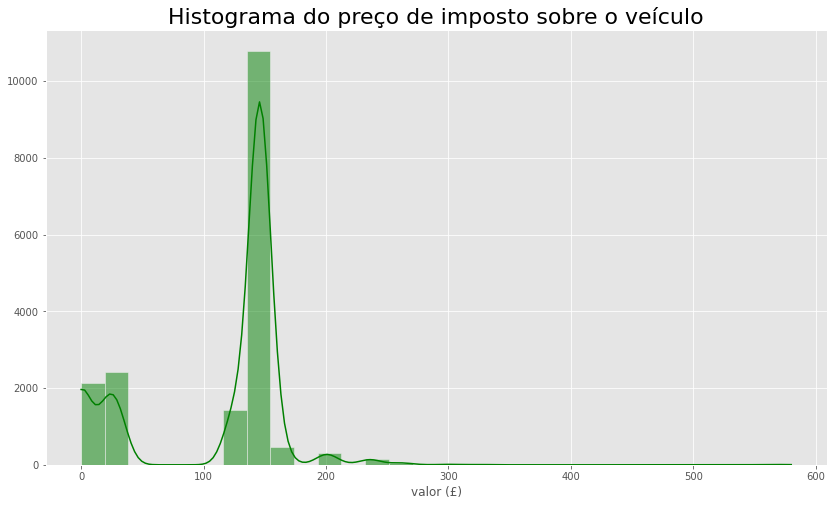

In [13]:
plt.figure(figsize=(14,8))
ax = sns.histplot(df.tax , bins=30 , kde=True , color="green")
ax.set_title("Histograma do preço de imposto sobre o veículo" , fontsize=22)
ax.set_xlabel("valor (£)")
ax.set_ylabel("")
ax=ax

Já a distribuição dos valores de imposto não estão tão bem distribuídas , provavelmente por serem fixos para cada modelo de carro e não dependerem de outras variáveis.

Para as nossas análises usaremos 2 tipos de encodificações dos dados: Com o método "GetDummies" do pandas e o "LabelEncoder"

## LabelEncoder:

In [14]:
codificador = LabelEncoder()

In [15]:
df_label_encoder = df.copy()

Encodificando as labels

In [16]:
colunas = ['model','transmission','fuelType']
for coluna in colunas:
  df_label_encoder[coluna] = codificador.fit_transform(df_label_encoder[coluna])
  #df_label_encoder[coluna] = df_label_encoder[coluna].astype('category')

Visualizando os "novos" dados

In [17]:
df_label_encoder.head()

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,5,2017,12000,0,15944.0,4,150.0,57.7,1.0
1,6,2018,14000,1,9083.0,4,150.0,57.7,1.0
2,6,2017,13000,1,12456.0,4,150.0,57.7,1.0
3,5,2019,17500,1,10460.0,4,145.0,40.3,1.5
4,5,2019,16500,0,1482.0,4,145.0,48.7,1.0


Para nossos valores que anteriormente eram textos agora recebem um valor inteiro que representa eles.

### Mais Gráficos:

vamos começar visualizando a correlação entre as nossas variáveis:

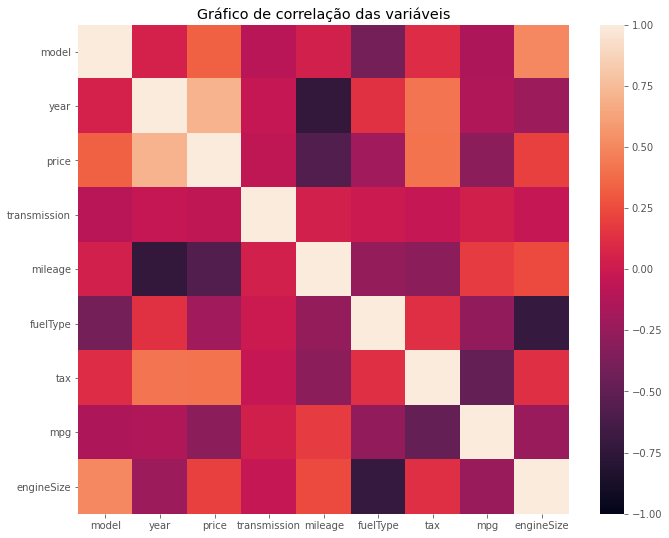

In [18]:
plt.figure(figsize=(11,9))
ax = sns.heatmap(df_label_encoder.corr(method='spearman'),vmin=-1 , vmax=1)
ax.set_title("Gráfico de correlação das variáveis")
ax = ax

Podemos notar algumas correlações interessantes : aparentemente o modelo do carro tem uma certa influência no preço (mesmo que pequena) , tal como o ano também tem. 

Vamos visualizar ste mesmo gráfico de uma maneira melhor

Aqui temos a relação entre o preço e nossas variáveis:

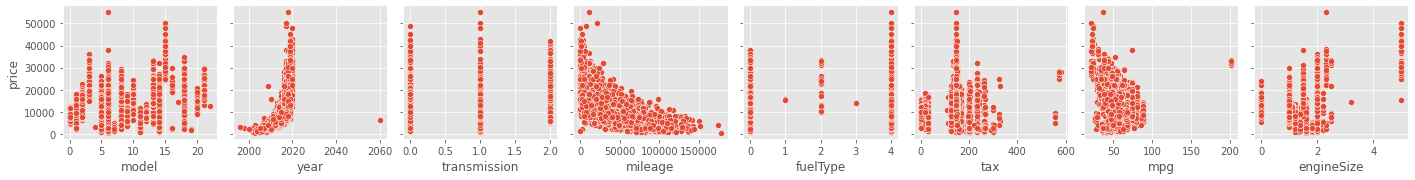

In [19]:
# correlaçãoes das variáveis
colunas = df_label_encoder.drop("price",axis=1).columns
ax = sns.pairplot(df_label_encoder , x_vars=colunas , y_vars="price")
ax=ax

Algo interessante são alguns pontos na variável "year" e na variável "mpg". São o que podemos considerar "outliers" , pontos que , em tese , não deveriam estar alí.

Vamos analisar melhor e ver se realmente o são

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


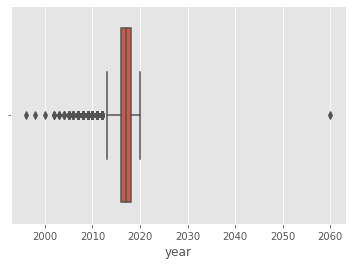

In [20]:
ax = sns.boxplot(df_label_encoder["year"])
ax=ax

De fato há algo de errado , não é possível ter um carro no ano de 2060, ainda...

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


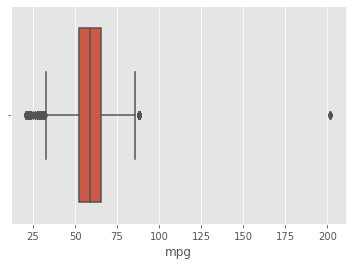

In [21]:
ax = sns.boxplot(df_label_encoder["mpg"])
ax=ax

Na variável "mpg" também a um ponto com valor de 200 que está muito longo do padrão.

**Vamos remover estes outliers**

In [22]:
# função que retorna os valores de Outliers
def retorna_outlier(df , coluna):
  Q3 = df[coluna].quantile(.75)
  Q1 = df[coluna].quantile(.25)
  IQR = Q3-Q1

  outlier_inferior = Q1 - 3*IQR
  outlier_superior = Q3 + 3*IQR

  return outlier_inferior , outlier_superior

In [23]:
# função que retorna o index do outliers no dataframe:
def retorna_indice_outlier(df,coluna , oulier_superior):
  df_filtrado = df.query("{} > {}".format(coluna , oulier_superior))
  return df_filtrado.index

In [24]:
outlier_inferior_year , outlier_superior_year = retorna_outlier(df_label_encoder,'year')
print("Feature Ano:")
print("Outlier Inferior:{} , outlier Superior:{}".format(outlier_inferior_year , outlier_superior_year))

Feature Ano:
Outlier Inferior:2010.0 , outlier Superior:2024.0


provavelmente o Outlier inferior está correto , mas o superior não!

In [25]:
index_outlier_year = retorna_indice_outlier(df_label_encoder,'year' , outlier_superior_year)
print("index:",index_outlier_year)

index: Int64Index([17726], dtype='int64')


In [26]:
outlier_inferior_mpg , outlier_superior_mpg = retorna_outlier(df_label_encoder,'mpg')
print("Feature 'mpg':")
print("Outlier Inferior:{} , outlier Superior:{}".format(round(outlier_inferior_mpg) , round(outlier_superior_mpg)))

Feature 'mpg':
Outlier Inferior:12 , outlier Superior:106


O outlier inferior apesar de , matematicamente , ser um outlier podemos considerá-lo um valor padrão , pois muitos dos nossos dados se agrupam lá , ao contrário do inferior. 

In [27]:
index_outlier_mpg = retorna_indice_outlier(df_label_encoder,'mpg' , outlier_superior_mpg)
print("index:",index_outlier_mpg)

index: Int64Index([6153, 6536, 9220, 12862, 13730], dtype='int64')


In [28]:
df_label_encoder = df_label_encoder.drop(index_outlier_year)
df_label_encoder = df_label_encoder.drop(index_outlier_mpg)

In [29]:
print("{} linhas \n {} colunas".format(df_label_encoder.shape[0] , df_label_encoder.shape[1]))

17805 linhas 
 9 colunas


Vamos novamente vizualizar a correlação das nossas variáveis:

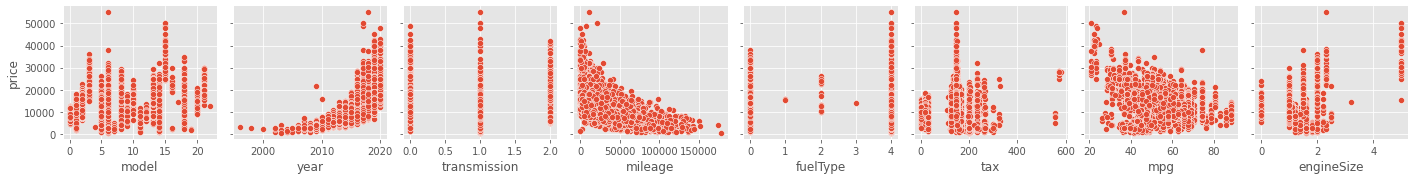

In [30]:
# correlaçãoes das variáveis
colunas = df_label_encoder.drop("price",axis=1).columns
ax = sns.pairplot(df_label_encoder , x_vars=colunas , y_vars="price")
ax=ax

Podemos ver que as features "mpg" e "year" agora estão padronizadas

Vamos agora criar uma parte dos nossos dados com o GetDummies

## GetDummies

In [31]:
df_dummies = df.copy()

In [32]:
df_dummies = pd.get_dummies(df_dummies , columns=['model','transmission','fuelType'])

In [33]:
df_dummies = df_dummies.drop(index_outlier_year)
df_dummies = df_dummies.drop(index_outlier_mpg)

In [34]:
print("{} linhas \n {} colunas".format(df_dummies.shape[0] , df_dummies.shape[1]))

17805 linhas 
 37 colunas


Podemos notar que agora temos um número bem maior de colunas , mas o que aconteceu?

In [35]:
df_dummies.head()

,year,price,mileage,tax,mpg,engineSize,model_ B-MAX,model_ C-MAX,model_ EcoSport,model_ Edge,model_ Escort,model_ Fiesta,model_ Focus,model_ Fusion,model_ Galaxy,model_ Grand C-MAX,model_ Grand Tourneo Connect,model_ KA,model_ Ka+,model_ Kuga,model_ Mondeo,model_ Mustang,model_ Puma,model_ Ranger,model_ S-MAX,model_ Streetka,model_ Tourneo Connect,model_ Tourneo Custom,model_ Transit Tourneo,transmission_Automatic,transmission_Manual,transmission_Semi-Auto,fuelType_Diesel,fuelType_Electric,fuelType_Hybrid,fuelType_Other,fuelType_Petrol
0,2017,12000,15944.0,150.0,57.7,1.0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1
1,2018,14000,9083.0,150.0,57.7,1.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1
2,2017,13000,12456.0,150.0,57.7,1.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1
3,2019,17500,10460.0,145.0,40.3,1.5,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1
4,2019,16500,1482.0,145.0,48.7,1.0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1


Perceba que para as variáveis que eram categóricas agora se transformaram colunas , com valores 0 ou 1 , onde 0 siginifica que não está presente e 1 está presente.

No exemplo que temos , na primeira linha o modelo do carro é Fiesta , portanto será marcado como 1 na coluna "model_Fiesta"

## Testes estatísticos

Anteriormente vimos um "heatmap" (gráfico de calor) da correlação das variáveis , mas agora com o teste Q² veremos quais variáveis realmente são relevantes.

In [36]:
# função que nos diz se há correlação entre as variáveis:
def existe_corelacao(df,coluna):
  tab = pd.crosstab(df["price"] , df[coluna])
  chi2 , p , _ , _ = chi2_contingency(tab)
  if p < 0.05:
    print("Entre as variáveis 'price' e {} existe correlação".format(coluna))
  else:
    print("Entre as variáveis 'price' e {} NÃO existe correlação".format(coluna))

In [37]:
# Para os dados com LabelEncoder:
variaveis = df_label_encoder.drop(['price'],axis=1).columns
print("Dataset com 'LabelEncoder'")
for coluna in variaveis:
  existe_corelacao(df_label_encoder , coluna)

Dataset com 'LabelEncoder'
Entre as variáveis 'price' e model existe correlação
Entre as variáveis 'price' e year existe correlação
Entre as variáveis 'price' e transmission existe correlação
Entre as variáveis 'price' e mileage NÃO existe correlação
Entre as variáveis 'price' e fuelType existe correlação
Entre as variáveis 'price' e tax existe correlação
Entre as variáveis 'price' e mpg existe correlação
Entre as variáveis 'price' e engineSize existe correlação


Parece não haver relação entre o preço e a milhagem rodada dos carros , mas talvez se você alterar o valor e colocar em log pode obter um valor diferente , não farei isso aqui

In [38]:
# Para os dados de GetDummies
variaveis = df_dummies.drop(['price'],axis=1).columns
print("Dataset Get_dummies")
for coluna in variaveis:
  existe_corelacao(df_dummies , coluna)

Dataset Get_dummies
Entre as variáveis 'price' e year existe correlação
Entre as variáveis 'price' e mileage NÃO existe correlação
Entre as variáveis 'price' e tax existe correlação
Entre as variáveis 'price' e mpg existe correlação
Entre as variáveis 'price' e engineSize existe correlação
Entre as variáveis 'price' e model_ B-MAX existe correlação
Entre as variáveis 'price' e model_ C-MAX NÃO existe correlação
Entre as variáveis 'price' e model_ EcoSport NÃO existe correlação
Entre as variáveis 'price' e model_ Edge existe correlação
Entre as variáveis 'price' e model_ Escort NÃO existe correlação
Entre as variáveis 'price' e model_ Fiesta existe correlação
Entre as variáveis 'price' e model_ Focus existe correlação
Entre as variáveis 'price' e model_ Fusion existe correlação
Entre as variáveis 'price' e model_ Galaxy existe correlação
Entre as variáveis 'price' e model_ Grand C-MAX NÃO existe correlação
Entre as variáveis 'price' e model_ Grand Tourneo Connect NÃO existe correlação
E

Para o caso do Get_dummies temos resultados dúbios. Aparentemente alguns modelos de carros tem relação com o preço , outros não. Dessa maneiras , faz mais sentido usar todos os dados de modelo do que somente uma parcela.

Nesse caso ou usamos todos , ou não usamos nenhum.

## Machine Learning

In [39]:
# dividindo as features e a variável alvo
X_label_encoder = df_label_encoder.drop(["price"] , axis=1) 
X_dummies = df_dummies.drop(["price"] , axis=1)

y_label_encoder = df_label_encoder.price
y_dummies = df_dummies.price

### LabelEncoder

In [40]:
# divisão dos dados em treino e teste
X_treino , X_teste , y_treino , y_teste = train_test_split(X_label_encoder , y_label_encoder , random_state=28 ,  shuffle = True)

In [41]:
# instanciando o modelo
modelo_LE = LinearRegression()

In [42]:
# treinando o modelo
modelo_LE.fit(X_treino , y_treino)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [43]:
# predicoes
predicoes = modelo_LE.predict(X_teste)

In [44]:
# calculando o valor do r2_score
r2 = modelo_LE.score(X_teste , y_teste)
print("Pontuação R²: {}".format(r2))

Pontuação R²: 0.7710231870200148


In [45]:
# calculando o erro quadrático médio:
eqm = mean_squared_error(predicoes , y_teste)
eqm = eqm **(1/2)
print( "Erro Quadrático Médio : {}".format(eqm) )

Erro Quadrático Médio : 2311.9474900617784


Com este valor podemos saber o quanto nosso modelo varia em acertividade . Neste caso , o valor predito de um carro pode variar 2311 para cima ou para baixo , desta forma:

-   *Valor Máximo* = **Valor Predito** + 2311
-   *Valor Mínimo* = **Valor Predito** - 2311

Uma variação relativamente alta

O que se costuma fazer para diminuir esse erro é usar os valor em logaritmo:

### LabelEnconder com Log

In [46]:
# fazendo a divisão dos dados em dados de treino e teste
X_treino , X_teste , y_treino , y_teste = train_test_split(X_label_encoder , y_label_encoder , random_state=28 ,  shuffle = True)

In [47]:
# logaritmando as colunas numéricas
colunas_log = ["mileage","tax","mpg"]
for coluna in colunas_log:
  X_treino[coluna] = np.log(X_treino[coluna] + 1)
  X_teste[coluna] = np.log(X_teste[coluna] + 1)

y_treino , y_teste = np.log(y_treino + 1) , np.log(y_teste + 1)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [48]:
# instanciando o modelo
modelo_log_LE = LinearRegression()

In [49]:
# treinando o modelo
modelo_log_LE.fit(X_treino , y_treino)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [50]:
# fazendo as predicoes
predicoes = modelo_log_LE.predict(X_teste)

In [51]:
# calculando o r2 score
r2 = modelo_log_LE.score(X_teste , y_teste)
print("Pontuação R²: {}".format(r2))

Pontuação R²: 0.8029271764228204


In [52]:
# transformando os dados na forma de log para dados numéricos reais
predicoes = np.exp(predicoes)
y_teste = np.exp(y_teste)

In [53]:
# calculando o valor do erro quadrático médio
eqm = mean_squared_error(predicoes , y_teste)
eqm = eqm **(1/2)
print( "Erro Quadrático Médio : {}".format(eqm) )

Erro Quadrático Médio : 2403.1941286753686


Nesta situação tivemos um valor ainda maior

Vamos para o GetDummies

### GetDummies

In [54]:
# fazendo a divisão dos dados
X_treino , X_teste , y_treino , y_teste = train_test_split(X_dummies , y_dummies , random_state=28 ,  shuffle = True)

In [55]:
# instanciando o modelo
modelo_dummies = LinearRegression()

In [56]:
# treinando o modelo com os dados de teste
modelo_dummies.fit(X_treino , y_treino)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [57]:
# fazendo predições
predicoes = modelo_dummies.predict(X_teste)

In [58]:
# calculando o valor de R2
r2 = modelo_dummies.score(X_teste , y_teste)
print("Pontuação R²: {}".format(r2))

Pontuação R²: 0.8639964745916111


In [59]:
# calculando o erro quadrático médio
eqm = mean_squared_error(predicoes , y_teste)
eqm = eqm **(1/2)
print( "Erro Quadrático Médio : {}".format(eqm) )

Erro Quadrático Médio : 1781.7931945427733


Para este caso tivemos um valor menor (o que é bom) , de 1718 , mas que se analisar-mos bem , quando olhamos a distribuição do preço , vemos que esse valor ainda é alto , vamos ver como o valor com logaritmo se sai.

### GetDummies com Log

In [60]:
# dividindo os dados em dados de treino e teste
X_treino , X_teste , y_treino , y_teste = train_test_split(X_dummies , y_dummies , random_state=28 ,  shuffle = True)

In [61]:
# convertendo os valores numéricos para logaritmo
colunas_log = ["mileage","tax","mpg"]
for coluna in colunas_log:
  X_treino[coluna] = np.log(X_treino[coluna] + 1)
  X_teste[coluna] = np.log(X_teste[coluna] + 1)

y_treino , y_teste = np.log(y_treino + 1) , np.log(y_teste + 1)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [62]:
# instanciando o modelo
modelo_log_dummies = LinearRegression()

In [63]:
# treinando o modelo com os dados de treino
modelo_log_dummies.fit(X_treino , y_treino)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [64]:
# fazendo predições
predicoes = modelo_log_dummies.predict(X_teste)

In [65]:
# calculando o R2 Score
r2 = modelo_log_dummies.score(X_teste , y_teste)
print("Pontuação R²: {}".format(r2))

Pontuação R²: 0.882453803380799


In [66]:
# transformando os dados na forma de log para dados numéricos reais
predicoes = np.exp(predicoes)
y_teste = np.exp(y_teste)

In [67]:
# calculando o erro quadrático médio
eqm = mean_squared_error(predicoes , y_teste)
eqm = eqm **(1/2)
print( "Erro Quadrático Médio : {}".format(eqm) )

Erro Quadrático Médio : 1793.7420659036104


Novamente tivemos um valor levemente maior , mas ainda alto.

Entretanto , há um problema neste modelo . Além de um alto valor de Erro Quadrático Médio , ainda tem um problema ainda maior:

### O modelo vale a pena?

Como se comporta os dados do GetDummies? vamos visualizar com gráficos:

In [68]:
# criando um novo dataframe:
dados_comparacao = pd.DataFrame()

In [69]:
# criando as colunas com os valores máximos de predição e mínimo:
dados_comparacao["preco_base"] = y_dummies
dados_comparacao["preco_maximo"] = y_dummies + 1781
dados_comparacao["preco_minimo"] = y_dummies - 1781
dados_comparacao["predicoes"] = modelo_dummies.predict(X_dummies)
dados_comparacao["ano"] = X_dummies.year

In [70]:
dados_comparacao.head()

,preco_base,preco_maximo,preco_minimo,predicoes,ano
0,12000,13781,10219,11113.490208,2017
1,14000,15781,12219,14278.231666,2018
2,13000,14781,11219,12944.292438,2017
3,17500,19281,15719,16303.850270,2019
4,16500,18281,14719,15258.204246,2019


No DataFrame que eu criei temos 5 colunas:


*   **preco_base** = Preço real do carro
*   **preco_maximo** = O preço máximo que o carro deve ter a partir do erro quadrático médio (nas predições)
*   **preco_minimo** = O preço mínimo que o carro deve ter a partir do erro quadrático médio (nas predições)
*   **predicoes** = Valor daquele carro predito pelo modelo
*   **ano** = Ano do carro



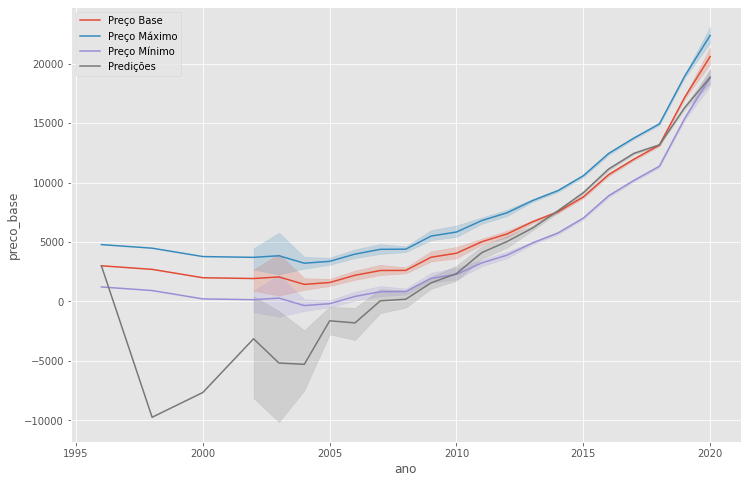

In [71]:
plt.figure(figsize=(12,8))
sns.lineplot(data=dados_comparacao , x="ano" , y="preco_base")
sns.lineplot(data=dados_comparacao , x="ano" , y="preco_maximo")
sns.lineplot(data=dados_comparacao , x="ano" , y="preco_minimo")
sns.lineplot(data=dados_comparacao , x="ano" , y="predicoes")
plt.legend(labels=["Preço Base","Preço Máximo","Preço Mínimo","Predições"])

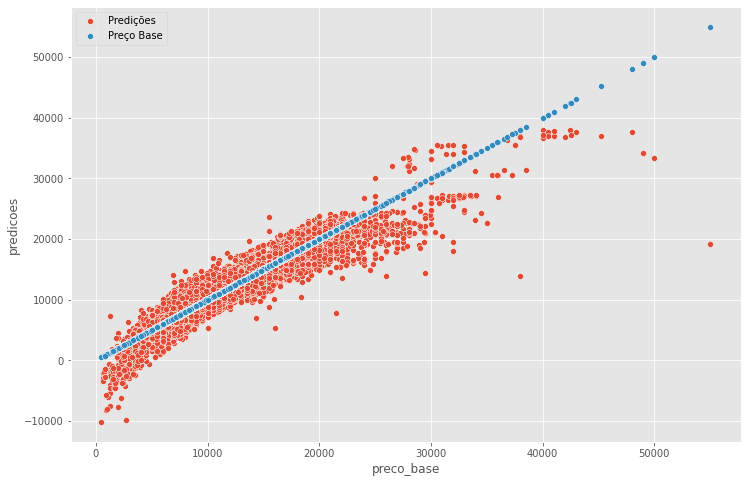

In [73]:
plt.figure(figsize=(12,8))
sns.scatterplot(data=dados_comparacao , x="preco_base" , y="predicoes")
sns.scatterplot(data=dados_comparacao , x="preco_base" , y="preco_base")
plt.legend(labels=["Predições","Preço Base"])

Neste gráfico vemos um grave problema: **Temos dados que foram predito abaixo de zero , ou seja , nosso modelo por algum motivo previo alguns valores como negativos** , algo que não tem a menor lógica!

Por este motivo já inivabilizamos o LosgisticRegression. Devemos procurar outro Algoritmo!

### Testando outros algoritmos

In [74]:
# criando uma função que cria , treina e prediz o modelo com gráficos
def modelo_completo(modelo,X,y):
  X_treino , X_teste , y_treino , y_teste = train_test_split(X , y , random_state=28 ,  shuffle = True)
  model = modelo()
  model.fit(X_treino , y_treino)
  predicoes = model.predict(X_teste)
  r2 = model.score(X_teste , y_teste)
  eqm = mean_squared_error(predicoes , y_teste)
  eqm = eqm **(1/2)
  print("Pontuação R²: {}".format(r2))
  print( "Erro Quadrático Médio : {}".format(eqm) )

  plt.figure(figsize=(12,8))
  ax=sns.scatterplot(x=y_teste , y=predicoes)
  ax=sns.scatterplot(x=y_teste , y=y_teste)
  plt.legend(labels=["Predições","Real"])
  ax.axhline(0 , color="black")

  return model

#### GetDummies:

Pontuação R²: 0.8638897755788678
Erro Quadrático Médio : 1782.4919937133016


Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

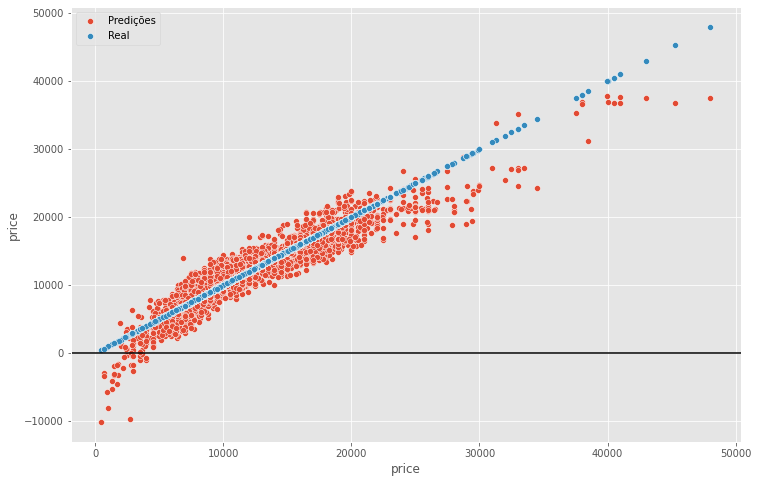

In [75]:
# Para o Get Dummies usando o Ridge
modelo_completo(Ridge , X_dummies , y_dummies)

Pontuação R²: 0.8635290953317404
Erro Quadrático Médio : 1784.8521555059122


Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

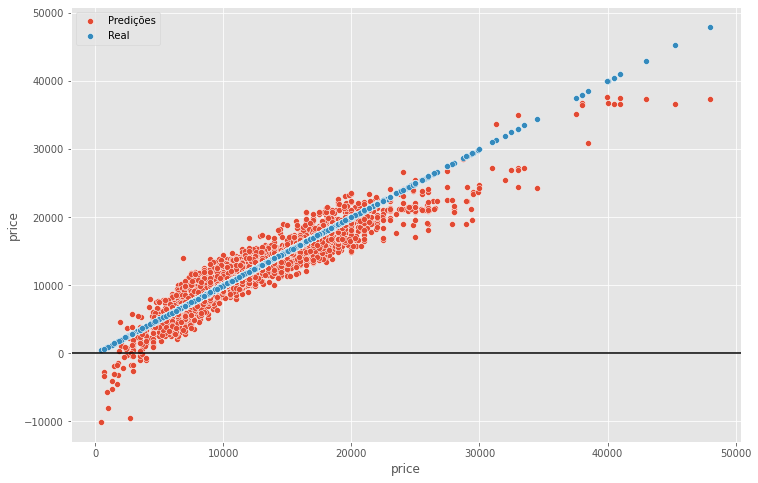

In [76]:
# Para o Get Dummies usando o Lasso
modelo_completo(Lasso , X_dummies , y_dummies)

Pontuação R²: 0.7150074743931559
Erro Quadrático Médio : 2579.2827156779817


ElasticNet(alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0.5,
           max_iter=1000, normalize=False, positive=False, precompute=False,
           random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

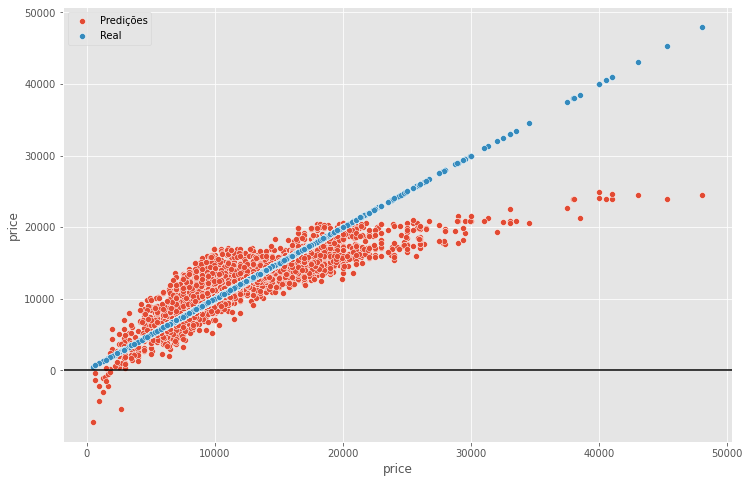

In [77]:
# Para o Get Dummies usando o ElasticNet
modelo_completo(ElasticNet , X_dummies , y_dummies)

Pudemos notar que para quaisquer outro algoritmo (usando o GetDummies) obtemos o mesmo problema: **Valores negativos**

#### LabelEncoder

Pontuação R²: 0.7710039553229839
Erro Quadrático Médio : 2312.0445779274423


Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

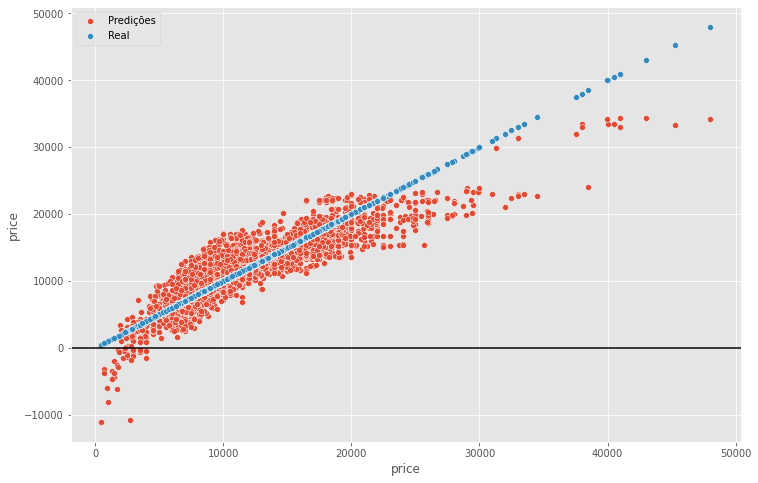

In [78]:
# Para o LabelEncoder usando o Ridge
modelo_completo(Ridge , X_label_encoder , y_label_encoder)

Pontuação R²: 0.7709439637313527
Erro Quadrático Médio : 2312.3474088153935


Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

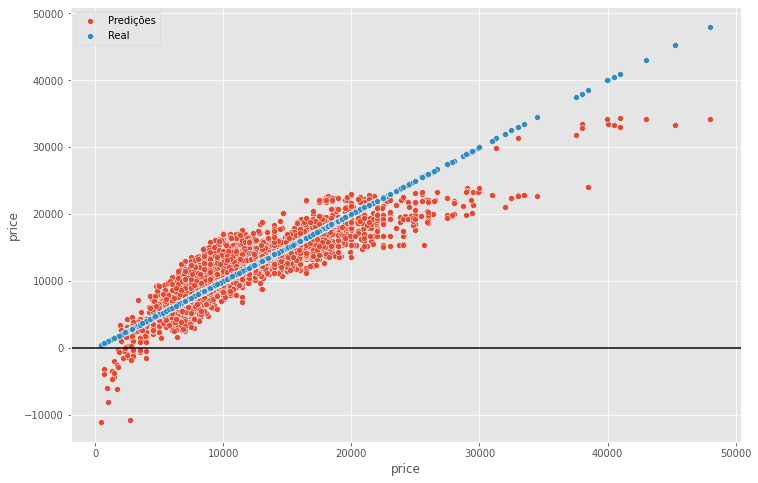

In [79]:
# Para o LabelEncoder usando o Lasso
modelo_completo(Lasso , X_label_encoder , y_label_encoder)

Pontuação R²: 0.7247076645655062
Erro Quadrático Médio : 2535.0076419164766


ElasticNet(alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0.5,
           max_iter=1000, normalize=False, positive=False, precompute=False,
           random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

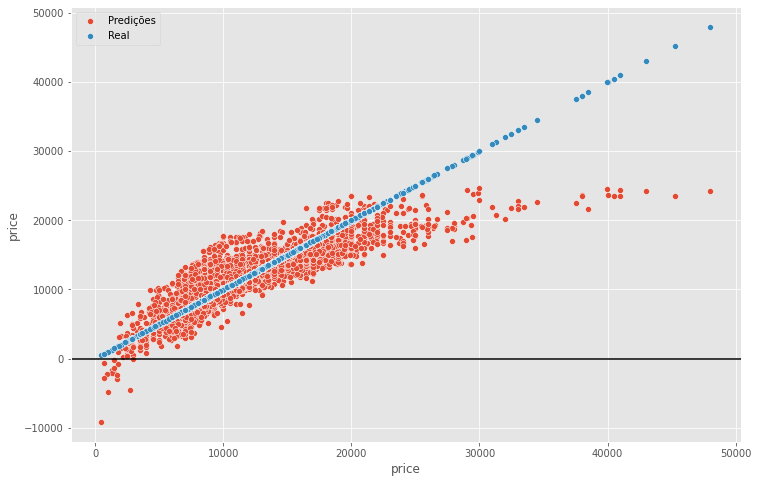

In [80]:
# Para o LabelEncoder usando o ElasticNet
modelo_completo(ElasticNet , X_label_encoder , y_label_encoder)

Para o LabelEncoder o mesmo resultado!

### XGBoost

Como última tentativa irei usar o XGBoost e ver como nos saímos!

[00:08:24] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Pontuação R²: 0.926718127165085
Erro Quadrático Médio : 1307.917927819153


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)

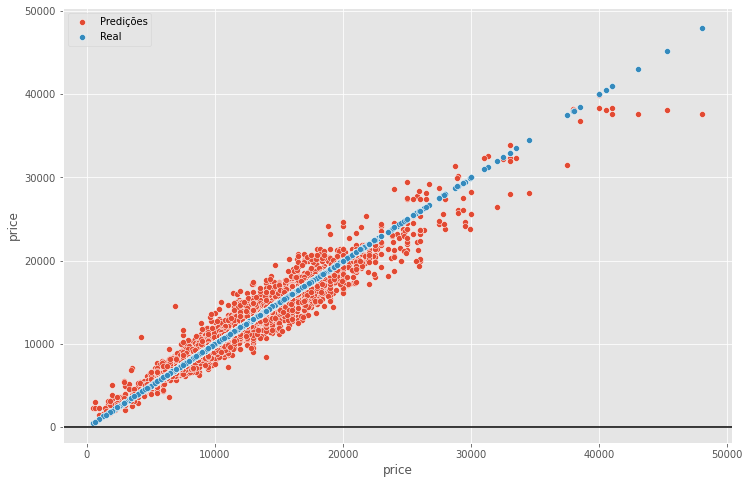

In [81]:
# Get Dummies
modelo_completo(XGBRegressor , X_dummies , y_dummies)

[00:08:26] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Pontuação R²: 0.9257150996422054
Erro Quadrático Médio : 1316.8384090312588


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)

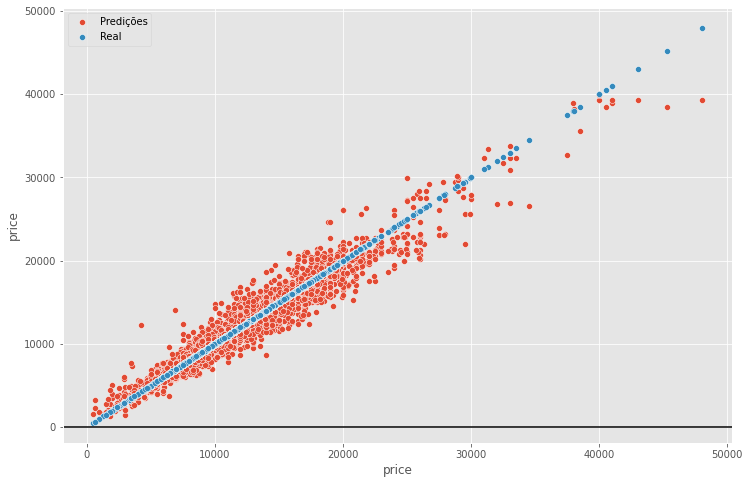

In [82]:
# LabelEncoder 
modelo_completo(XGBRegressor , X_label_encoder , y_label_encoder)

Tanto para os dados do *GetDummies* quanto para os do *LabelEncoder* obtivemos uma **valor de erro quadrático menor** (o que siginifca mais precisão) e o mais importante : Tivemos certeza que **nosso modelo não irá fazer Predições abaixo de zero (negativas)** evitando problemas!

## Por que o XGBoost?

O XGBoost é um algoritmo que vem tomando muito espaço no mundo da ciência de dados , principalmente por ser mais eficiente e rápido !

O XGBoost (*Extreme Gradient Boost*) usa a ideia de **agrupamento de árvores de decisões** , assim como o RandomForest , mas para cada árvores criada há uma **taxa melhora N** conforme as árvores são criadas.

O objetivo deste artigo não é falar sobre o XGB , futuramente irei explorá-lo melhor!

**estudar o XGBOOST**

## Por que o GetDummies foi melhor?

Mas por que com o mesmo conjunto de dados obtivemos resultados diferente?

Modelos de Regressão formulam uma equação que se regula aos dados e faz predições , atua muito bem com valores numéricos. Entretanto , quando se trata de dados categóricos a história é outra... 

**Não** podemos dizer que o modelo *Fiesta* (catalogado como 10) é melhor que o modelo *FordKA* (catalogado como 1) , muito menos que ele seja 10 vezes melhor , visto que a relação entre eles não é crescente (os dados de 1 e 10 foram "aleatórios"), em decorrência disso usar o GetDummies se torna melhor.

**Regressões trabalham bem com valores numéricos e com dados binários**(mas com muitas categorias nem tanto).